In [1]:
import numpy as np
from numpy.random import exponential, randint
from numpy import *   #ones, cumsum, sum, isscalar
from matplotlib.pylab import * 
%matplotlib inline
plotose = True
import pickle


In [2]:
from data_Fullset import SCxL23 as exppar


In [ ]:
condition = '1000_70_65'

In [3]:
with open("data_Fullset/Fullset.pkl","rb") as f:
    data = pickle.load(f)

In [4]:
for key in data.keys():
    print(key,":",data[key].shape)

#Sp : (390,)
#Bch : (390,)
Dsb : (390,)
Dss : (390,)
d_interSp : (390,)
Vtot : (390,)
Vh : (390,)
Ln : (390,)
SA : (390,)
nPSD : (390,)
A1 : (390,)
A2 : (390,)
GPHN_SNR : (390,)
DiS-EMchk : (390,)
Lneck : (390,)
maxDneck : (390,)
minDneck : (390,)
meanDneck : (390,)
Rneck : (390,)
Lhead : (390,)
maxDhead : (390,)
minDhead : (390,)
meanDhead : (390,)
Ah : (390,)
Rhead : (390,)
meanDneck_trunc70pc : (390,)


In [5]:
import pandas as pd

In [6]:
gAMPA = pd.DataFrame((data['A1']*exppar.gtrA)*1e3)
gNMDA = pd.DataFrame((data['A1']*exppar.gtrN)*1e3)

print(gAMPA.describe())
print(gNMDA.describe())

               A1
count  384.000000
mean     0.455979
std      0.434453
min      0.037986
25%      0.153269
50%      0.307392
75%      0.609916
max      3.130098
               A1
count  384.000000
mean     0.497596
std      0.474105
min      0.041453
25%      0.167257
50%      0.335447
75%      0.665583
max      3.415782


In [7]:
.400/sqrt(390)

0.020254787341673335

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe978d6bf60>]],
      dtype=object)

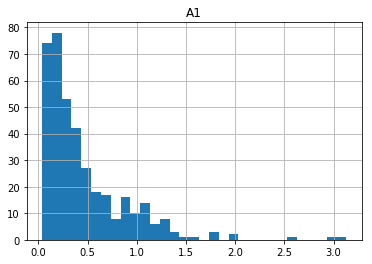

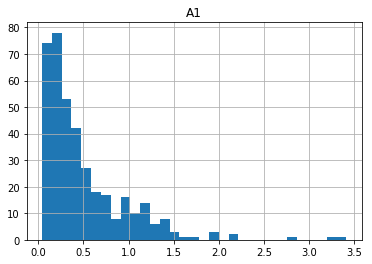

In [8]:
gAMPA.hist(bins=31)
gNMDA.hist(bins=31)

In [9]:
with open("data_Fullset/shPSD_Morphometry.pkl","rb") as f:
    datash = pickle.load(f)

In [10]:
gGABA = pd.DataFrame((datash['A']*exppar.gtrG)*1e3)
gGABA.describe()

,A
count,61.000000
mean,1.000000
std,0.577148
min,0.328792
25%,0.632949
50%,0.850551
75%,1.257237
max,3.357836


In [11]:
gGABADiS = pd.DataFrame((data['A2'][data['A2']>0]*exppar.gtrG)*1e3)
gGABADiS.describe()

,A2
count,37.000000
mean,0.527511
std,0.277050
min,0.185705
25%,0.329125
50%,0.479948
75%,0.618991
max,1.560619


In [12]:
import pickle

In [59]:
folderstore = '/mnt/data/spinemodel/conditions/'

with open(folderstore+"All_baseline_datasetv3_"+condition+".pickle","rb") as f:
    vavgT,mesT,vtracsT,vtracsDT,vtracsST,CtracsT,me2T,_,dataT = pickle.load(f)

with open(folderstore+"All_baseline_depinhv3_"+condition+".pickle","rb") as f:
    messh,iPSDsh,posish,mesDiSI,spdataI = pickle.load(f)
   

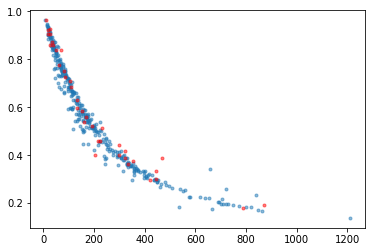

In [60]:
s0 = dataT['A2']>0
s1 = ~s0
plt.plot(abs(mesT[s1,0]),(mesT[s1,2])/mesT[s1,1],'.',label="Spine head",alpha=0.5)
plt.plot(abs(mesT[s0,0]),(mesT[s0,2])/mesT[s0,1],'.',c='r',label="Spine head",alpha=0.5)


In [61]:
attenuation = pd.DataFrame((mesT[:,2])/mesT[:,1])
(attenuation<0.9).sum()/attenuation.shape[0]

0    0.945312
dtype: float64

In [16]:
(1-attenuation).describe()

,0
count,384.000000
mean,0.427434
std,0.212023
min,0.036592
25%,0.247180
50%,0.434813
75%,0.608315
max,0.861681


Rneck for 50% attenuation: 210
Fraction of spines that attenuates more than 50%: 0.3671875


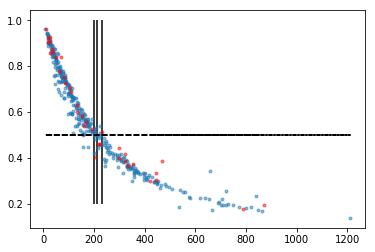

In [23]:
s0 = dataT['A2']>0
s1 = ~s0
plt.plot(abs(mesT[s1,0]),(mesT[s1,2])/mesT[s1,1],'.',label="Spine head",alpha=0.5)
plt.plot(abs(mesT[s0,0]),(mesT[s0,2])/mesT[s0,1],'.',c='r',label="Spine head",alpha=0.5)
plot(abs(mesT[s1,0]),abs(mesT[s1,0])*0+1.0-.5,'k--')
vlines(200,0.2,1.0)
vlines(210,0.2,1.0)
vlines(230,0.2,1.0)

print('Rneck for 50% attenuation:', 210)
print('Fraction of spines that attenuates more than 50%:', (attenuation.values<0.5).sum()/attenuation.shape[0] )


SA+
                 0
count  211.000000
mean     0.648556
std      0.188978
min      0.194395
25%      0.510027
50%      0.667815
75%      0.815124
max      0.963408
SA-
                 0
count  173.000000
mean     0.479883
std      0.201925
min      0.138319
25%      0.318234
50%      0.443421
75%      0.614584
max      0.938077


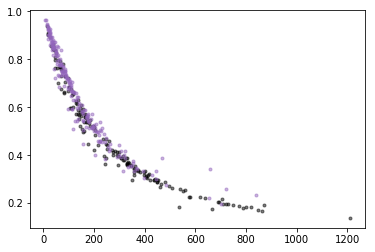

In [77]:
s0 = dataT['SA']==1.0
s1 = ~s0
plt.plot(abs(mesT[s1,0]),(mesT[s1,2])/mesT[s1,1],'k.',label="SA-",alpha=0.5)
plt.plot(abs(mesT[s0,0]),(mesT[s0,2])/mesT[s0,1],'.',c='tab:purple',label="SA+",alpha=0.5)
#plot(abs(mesT[s1,0]),abs(mesT[s1,0])*0+1.0-.5,'k--')
#vlines(200,0.2,1.0)
#vlines(210,0.2,1.0)
#vlines(230,0.2,1.0)
#print('Rneck for 50% attenuation:', 210)
#print('Fraction of spines that attenuates more than 50%:', (attenuation.values<0.5).sum()/attenuation.shape[0] )
print('SA+\n',pd.DataFrame(attenuation.values[dataT['SA']==1.0]).describe())
print('SA-\n',pd.DataFrame(attenuation.values[dataT['SA']!=1.0]).describe())

# 1-attenuation plot both figures
# plot mean of SA+- and all



In [78]:
temp = pd.DataFrame(attenuation.values[dataT['SA']!=1.0])
temp.describe()

,0
count,173.000000
mean,0.479883
std,0.201925
min,0.138319
25%,0.318234
50%,0.443421
75%,0.614584
max,0.938077


In [88]:
temp.quantile(0.1)[0], temp.quantile(0.9)[0]

(0.22328045623063356, 0.7685543994423277)

In [87]:
qqq = temp.quantile(0.1)
qqq[0]

0.22328045623063356

In [24]:
def getint(x):
    xc = x*1.0
    xc.sort()
    sh = xc.shape[0]
    xmed = xc[sh//2]
    s0= int(sh*(1-.6827)/2)
    s1 = sh-s0
    x0 = xc[s0]
    x1 = xc[s1]
    s0b= int(sh*(1-.95)/2)
    s1b = sh-s0b
    x0b = xc[s0b]
    x1b = xc[s1b]
    return((xmed,x0,x1,x0b,x1b))

print(mesT[:,1].mean(),getint(mesT[:,1]))
pd.DataFrame(mesT[:,1]).describe()

8.005856958978754 (6.106966176873016, 2.7748939634047076, 13.179952459093911, 1.6114937256326272, 23.872816867296116)


,0
count,384.000000
mean,8.005857
std,6.845976
min,0.896286
25%,3.433300
50%,6.106510
75%,10.129133
max,56.772171


In [44]:
data = {}
condition = '1000_70_65'

with open(folderstore+"dis_baselinev3_"+condition+".pickle","rb") as f:
    vavg,mes,vtracs,vtracsD,vtracsS,Ctracs = pickle.load(f)
data["dis_baseline"] = [vtracs,Ctracs]
with open(folderstore+"dis_ga_glu05v3_"+condition+".pickle","rb") as f:
    vavg,mes,vtracs,vtracsD,vtracsS,Ctracs = pickle.load(f)
data["dis_gaglu"] = [vtracs,Ctracs]
with open(folderstore+"dis_glu_ga05v3_"+condition+".pickle","rb") as f:
    vavg,mes,vtracs,vtracsD,vtracsS,Ctracs = pickle.load(f)
data["dis_gluga"] = [vtracs,Ctracs]
data["sis_gaglu"] = [vtracs,Ctracs]
data["sis_gluga"] = [vtracs,Ctracs]

with open(folderstore+"inhibition_v3_"+condition+".pickle","rb") as f:
    tdels,inhtimDis,_,tauDis,tauDis2,inhtimDism = pickle.load(f)

with open(folderstore+"inhibition_v3_outPSD_"+condition+".pickle","rb") as f:
    tdels,inhtimSis,_,tauSis,tauSis2,inhtimSism = pickle.load(f)


28.8% faster decay for shaft inh
20.3% faster decay for spinous inh


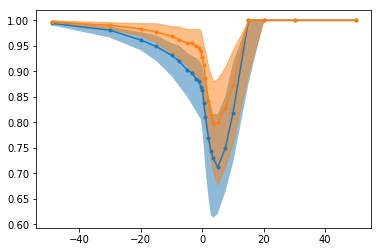

In [45]:
vm,sl,sv = tauSis2[:,15],tauSis2[:,16],tauSis2[:,17]
plot(tdels,vm,'C0.-',label='Dendritic\n inhibition')
fill_between(tdels,sl,sv,alpha=0.5)
print('{:.1f}% faster decay for shaft inh'.format(100*(1-vm.min())))
vm,sl,sv = tauDis2[:,15],tauDis2[:,16],tauDis2[:,17]
plot(tdels,vm,'C1.-',label='Spinous\n inhibition')
fill_between(tdels,sl,sv,color='C1',alpha=0.5)
print('{:.1f}% faster decay for spinous inh'.format(100*(1-vm.min())))

In Sv spine head:
Spinous inh - median 13.2, shaft inh - median 4.6


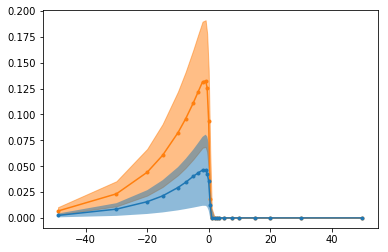

In [46]:

vm,sl,sv = 1-inhtimDis[:,0],1-inhtimDis[:,1],1-inhtimDis[:,2]
plot(tdels,vm,'C1.-',label='Spinous\n inhibition')
fill_between(tdels,sl,sv,color='C1',alpha=0.5)
vmsp = vm.copy()

vm,sl,sv = 1-inhtimSis[:,0],1-inhtimSis[:,1],1-inhtimSis[:,2]
plot(tdels,vm,'C0.-',label='Dendritic\n inhibition')
fill_between(tdels,sl,sv,alpha=0.5)

print('In Sv spine head:')
print('Spinous inh - median {:.1f}, shaft inh - median {:.1f}'.format(
               100*vmsp.max(), 100*vm.max() ))

In Sv dend shaft:
Spinous inh - median 15.08, shaft inh - median 13.99


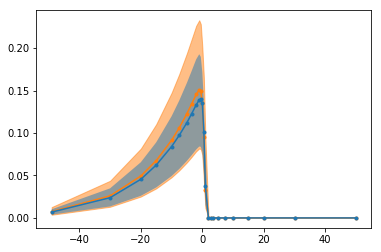

In [47]:


vm,sl,sv = 1-inhtimDis[:,1*5],1-inhtimDis[:,1*5+1],1-inhtimDis[:,1*5+2]
plot(tdels,vm,'C1.-',label='Spinous\n inhibition')
fill_between(tdels,sl,sv,color='C1',alpha=0.5)
vmsp = vm.copy()

vm,sl,sv = 1-inhtimSis[:,1*5],1-inhtimSis[:,1*5+1],1-inhtimSis[:,1*5+2]
plot(tdels,vm,'C0.-',label='Dendritic\n inhibition')
fill_between(tdels,sl,sv,alpha=0.5)


print('In Sv dend shaft:')
print('Spinous inh - median {:.2f}, shaft inh - median {:.2f}'.format(
               100*vmsp.max(), 100*vm.max() ))

Calcium in sp head:
Spinous inh - median 5.02, shaft inh - median 4.08


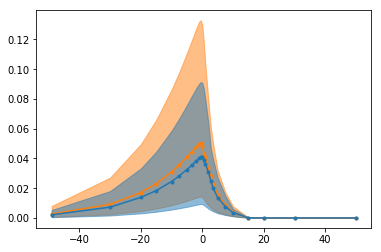

In [48]:

vm,sl,sv = 1-inhtimDis[:,3*5],1-inhtimDis[:,3*5+1],1-inhtimDis[:,3*5+2]
plot(tdels,vm,'C1.-',label='Spinous\n inhibition')
fill_between(tdels,sl,sv,color='C1',alpha=0.5)
vmsp = vm.copy()

vm,sl,sv = 1-inhtimSis[:,3*5],1-inhtimSis[:,3*5+1],1-inhtimSis[:,3*5+2]
plot(tdels,vm,'C0.-',label='Dendritic\n inhibition')
fill_between(tdels,sl,sv,alpha=0.5,color='C0')
#ax2.set_axis_off()

print('Calcium in sp head:')
print('Spinous inh - median {:.2f}, shaft inh - median {:.2f}'.format(
               100*vmsp.max(), 100*vm.max() ))

In [58]:
print('maximal q=0.66 :',(1-inhtimDis[:,3*5+1]).max()*100)

maximal q=0.66 : 13.294940722265046


In [38]:
data = {}
condition = '1000_80_65'

with open(folderstore+"dis_baselinev3_"+condition+".pickle","rb") as f:
    vavg,mes,vtracs,vtracsD,vtracsS,Ctracs = pickle.load(f)
data["dis_baseline"] = [vtracs,Ctracs]
with open(folderstore+"dis_ga_glu05v3_"+condition+".pickle","rb") as f:
    vavg,mes,vtracs,vtracsD,vtracsS,Ctracs = pickle.load(f)
data["dis_gaglu"] = [vtracs,Ctracs]
with open(folderstore+"dis_glu_ga05v3_"+condition+".pickle","rb") as f:
    vavg,mes,vtracs,vtracsD,vtracsS,Ctracs = pickle.load(f)
data["dis_gluga"] = [vtracs,Ctracs]
data["sis_gaglu"] = [vtracs,Ctracs]
data["sis_gluga"] = [vtracs,Ctracs]

with open(folderstore+"inhibition_v3_"+condition+".pickle","rb") as f:
    tdels,inhtimDis,_,tauDis,tauDis2,inhtimDism = pickle.load(f)

with open(folderstore+"inhibition_v3_outPSD_"+condition+".pickle","rb") as f:
    tdels,inhtimSis,_,tauSis,tauSis2,inhtimSism = pickle.load(f)


81.4% faster decay for shaft inh
64.8% faster decay for spinous inh


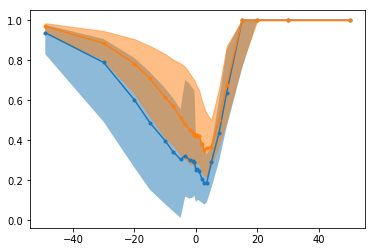

In [39]:
vm,sl,sv = tauSis2[:,15],tauSis2[:,16],tauSis2[:,17]
plot(tdels,vm,'C0.-',label='Dendritic\n inhibition')
fill_between(tdels,sl,sv,alpha=0.5)
print('{:.1f}% faster decay for shaft inh'.format(100*(1-vm.min())))
vm,sl,sv = tauDis2[:,15],tauDis2[:,16],tauDis2[:,17]
plot(tdels,vm,'C1.-',label='Spinous\n inhibition')
fill_between(tdels,sl,sv,color='C1',alpha=0.5)
print('{:.1f}% faster decay for spinous inh'.format(100*(1-vm.min())))

In spine head:
Spinous inh - median 28.2, shaft inh - median 21.3


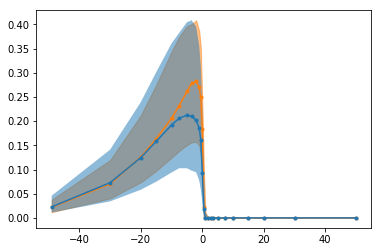

In [40]:
vm,sl,sv = 1-inhtimDis[:,0],1-inhtimDis[:,1],1-inhtimDis[:,2]
plot(tdels,vm,'C1.-',label='Spinous\n inhibition')
fill_between(tdels,sl,sv,color='C1',alpha=0.5)
vmsp = vm.copy()

vm,sl,sv = 1-inhtimSis[:,0],1-inhtimSis[:,1],1-inhtimSis[:,2]
plot(tdels,vm,'C0.-',label='Dendritic\n inhibition')
fill_between(tdels,sl,sv,alpha=0.5)

print('In spine head:')
print('Spinous inh - median {:.1f}, shaft inh - median {:.1f}'.format(
               100*vmsp.max(), 100*vm.max() ))

In dend shaft:
Spinous inh - median 34.12, shaft inh - median 48.09


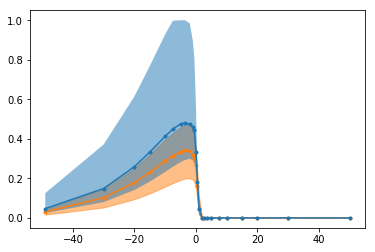

In [41]:
vm,sl,sv = 1-inhtimDis[:,1*5],1-inhtimDis[:,1*5+1],1-inhtimDis[:,1*5+2]
plot(tdels,vm,'C1.-',label='Spinous\n inhibition')
fill_between(tdels,sl,sv,color='C1',alpha=0.5)
vmsp = vm.copy()

vm,sl,sv = 1-inhtimSis[:,1*5],1-inhtimSis[:,1*5+1],1-inhtimSis[:,1*5+2]
plot(tdels,vm,'C0.-',label='Dendritic\n inhibition')
fill_between(tdels,sl,sv,alpha=0.5)


print('In dend shaft:')
print('Spinous inh - median {:.2f}, shaft inh - median {:.2f}'.format(
               100*vmsp.max(), 100*vm.max() ))

Calcium in sp head:
Spinous inh - median 12.50, shaft inh - median 15.18


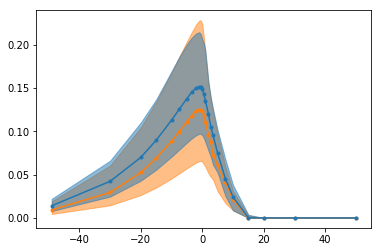

In [42]:
vm,sl,sv = 1-inhtimDis[:,3*5],1-inhtimDis[:,3*5+1],1-inhtimDis[:,3*5+2]
plot(tdels,vm,'C1.-',label='Spinous\n inhibition')
fill_between(tdels,sl,sv,color='C1',alpha=0.5)
vmsp = vm.copy()

vm,sl,sv = 1-inhtimSis[:,3*5],1-inhtimSis[:,3*5+1],1-inhtimSis[:,3*5+2]
plot(tdels,vm,'C0.-',label='Dendritic\n inhibition')
fill_between(tdels,sl,sv,alpha=0.5,color='C0')
#ax2.set_axis_off()

print('Calcium in sp head:')
print('Spinous inh - median {:.2f}, shaft inh - median {:.2f}'.format(
               100*vmsp.max(), 100*vm.max() ))